In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

In [2]:
# 한글폰트 사용
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv('covid_data.csv', index_col = 0)
df.tail(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주
193386,203,7842,2020-03-11,강서구,-,Ace 손해보험,퇴원,2020,3,11,11
193387,202,7567,2020-03-10,노원구,-,Ace 손해보험,퇴원,2020,3,10,11
193388,201,7711,2020-03-10,노원구,-,Ace 손해보험,퇴원,2020,3,10,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193389 entries, 0 to 193388
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연번      193389 non-null  int64 
 1   환자      193389 non-null  int64 
 2   확진일     193389 non-null  object
 3   거주지     193389 non-null  object
 4   여행력     193389 non-null  object
 5   접촉력     193389 non-null  object
 6   퇴원현황    143961 non-null  object
 7   년       193389 non-null  int64 
 8   월       193389 non-null  int64 
 9   일       193389 non-null  int64 
 10  주       193389 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 17.7+ MB


In [5]:
# null 값 보기 
tot = df.isnull().sum().sort_values(ascending=False)
pct = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([tot, pct], axis=1, keys=['Total', 'Percent'])
missing_data

# 퇴원현황 컬럼안에는 아직 퇴원, 사망으로 기록되지 않은 환자들이 존재함으로 결측값 있음 

,Total,Percent
퇴원현황,49428,0.255588
연번,0,0.000000
환자,0,0.000000
확진일,0,0.000000
거주지,0,0.000000
여행력,0,0.000000
접촉력,0,0.000000
년,0,0.000000
월,0,0.000000
일,0,0.000000


In [6]:
#  확진일 datatime 형태로 변경 
df["확진일"] = pd.to_datetime(df["확진일"])

In [7]:
x= df["확진일"].value_counts().sort_index()

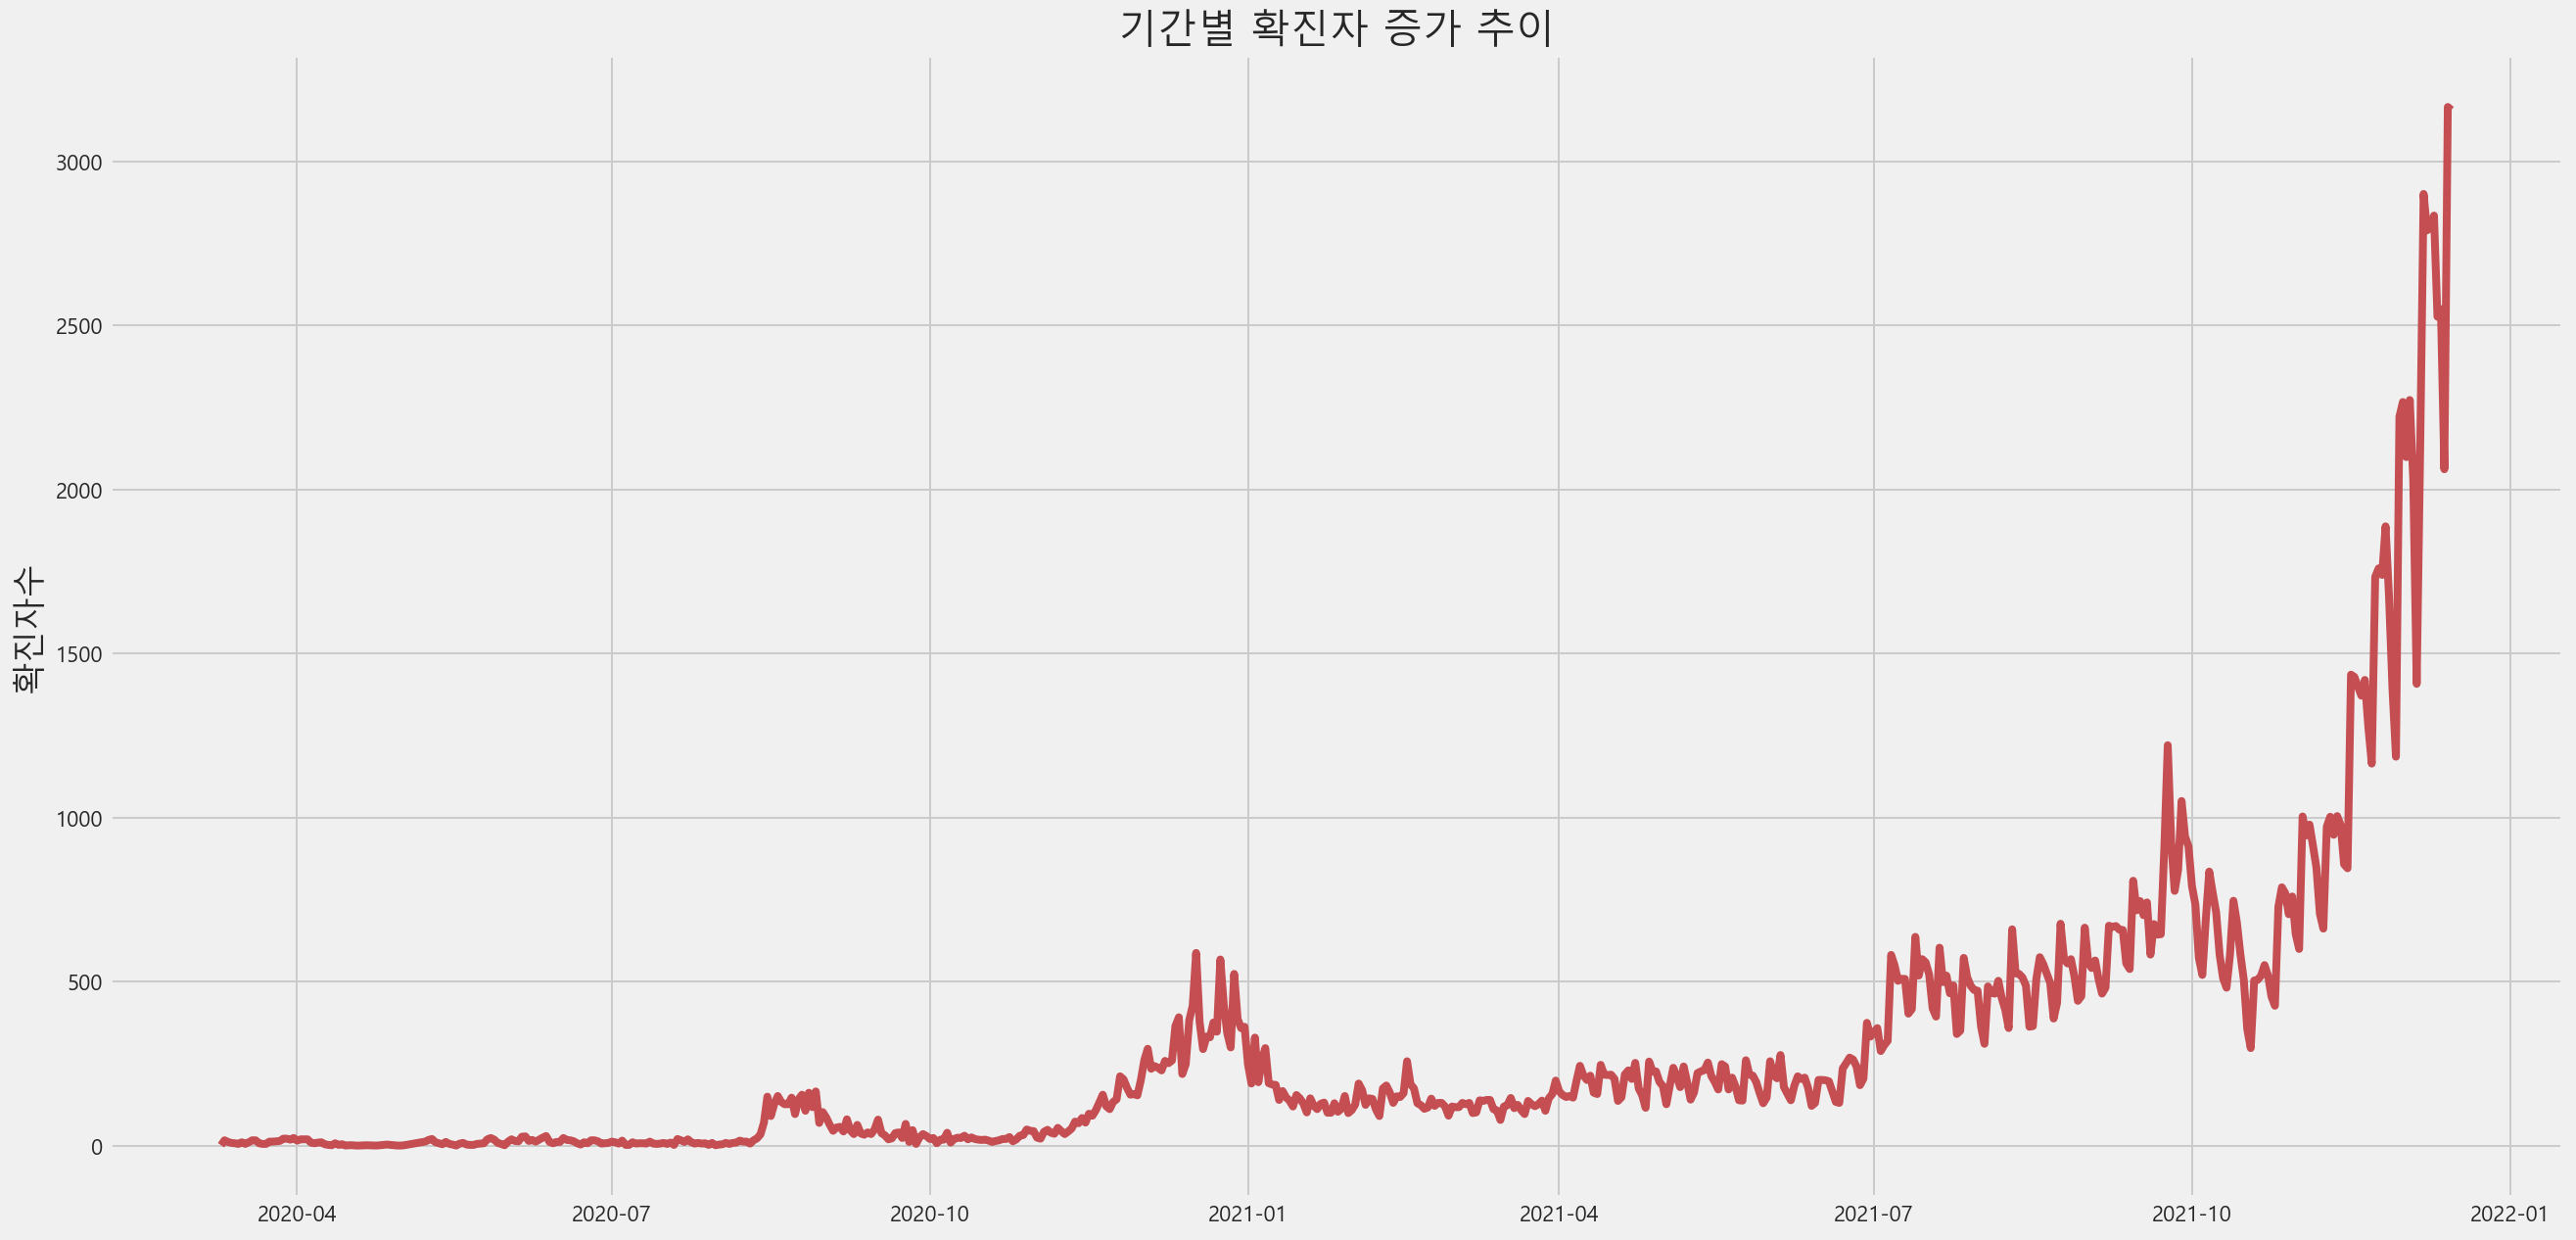

In [8]:
fig , ax = plt.subplots(figsize =  (20,10))

sns.lineplot( x.index, x.values , ax = ax,color = "r")
ax.set_title("기간별 확진자 증가 추이")
ax.set_ylabel("확진자수")
plt.show()

#### 거리 두기 시행 
20.3.22 ~ 20.4.7 (강화된 거리두기 )  2단계  
20.04.08 ~ 20.4,19 (첫 집합금지 명령) 2단계  
20.4.20 ~ 20.5.5 (일부조치 완하) 1단계
20.5.6 ~ 20.8.15  (생활속 거리두기) 0단계  
20.8.16 ~ 20.8.20 2단계   
20.8.21 ~ 20.9.12 2.5 단계   
20.9.13 ~ 20.10.10 2단계  
20.10.11 ~ 11.16 1단계  
20.11.17 ~ 20.11.23 1.5 단계  
20.11.24 ~ 20.12.7 2단계  
20.12.8 ~ 21.2.14 2.5단계  
21.2.15 ~ 21.10.31 2단계   
21.11.1 ~ 21.12.16 0단계   

In [9]:
df.loc[df["확진일"].isin(pd.date_range("2020-03-10","2020-03-21")), "거리두기" ] = 0
df.loc[df["확진일"].isin(pd.date_range("2020-03-22","2020-04-19")), "거리두기" ] = 2
df.loc[df["확진일"].isin(pd.date_range("2020-04-20","2020-05-05")), "거리두기" ] = 1 
df.loc[df["확진일"].isin(pd.date_range("2020-05-06","2020-08-15")), "거리두기" ] = 0
df.loc[df["확진일"].isin(pd.date_range("2020-08-16","2020-08-20")), "거리두기" ] = 2 
df.loc[df["확진일"].isin(pd.date_range("2020-08-21","2020-09-12")), "거리두기" ] = 2.5 
df.loc[df["확진일"].isin(pd.date_range("2020-09-13","2020-10-10")), "거리두기" ] = 2 
df.loc[df["확진일"].isin(pd.date_range("2020-10-11","2020-11-16")), "거리두기" ] = 1 
df.loc[df["확진일"].isin(pd.date_range("2020-11-17","2020-11-23")), "거리두기" ] = 1.5
df.loc[df["확진일"].isin(pd.date_range("2020-11-24","2020-12-07")), "거리두기" ] = 2 
df.loc[df["확진일"].isin(pd.date_range("2020-12-08","2021-02-14")), "거리두기" ] = 2.5 
df.loc[df["확진일"].isin(pd.date_range("2021-02-15","2021-10-31")), "거리두기" ] = 2 
df.loc[df["확진일"].isin(pd.date_range("2021-11-01","2021-12-15")), "거리두기" ] = 0

In [10]:
df13 = df.loc[df["확진일"].isin(pd.date_range("2020-03-10","2020-03-21"))]
df1 = df.loc[df["확진일"].isin(pd.date_range("2020-03-22","2020-04-19"))]
df2 = df.loc[df["확진일"].isin(pd.date_range("2020-04-20","2020-05-05"))]
df3 = df.loc[df["확진일"].isin(pd.date_range("2020-05-06","2020-08-15"))]
df4 = df.loc[df["확진일"].isin(pd.date_range("2020-08-16","2020-08-20"))]
df5 = df.loc[df["확진일"].isin(pd.date_range("2020-08-21","2020-09-12"))]
df6 = df.loc[df["확진일"].isin(pd.date_range("2020-09-13","2020-10-10"))]
df7 = df.loc[df["확진일"].isin(pd.date_range("2020-10-11","2020-11-16"))]
df8 = df.loc[df["확진일"].isin(pd.date_range("2020-11-17","2020-11-23"))]
df9 = df.loc[df["확진일"].isin(pd.date_range("2020-11-24","2020-12-07"))]
df10 = df.loc[df["확진일"].isin(pd.date_range("2020-12-08","2021-02-14"))]
df11 = df.loc[df["확진일"].isin(pd.date_range("2021-02-15","2021-10-31"))]
df12 = df.loc[df["확진일"].isin(pd.date_range("2021-11-01","2021-12-15"))]

In [11]:
df_거리두기 = pd.concat([df13, df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
df_거리두기.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기
193265,324,8816,2020-03-21,서초구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
193266,323,8826,2020-03-21,서대문구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
193267,322,8881,2020-03-21,서대문구,유럽,해외유입,퇴원,2020,3,21,12,0.0


In [12]:
df_거리두기 = df.set_index("확진일")
df_거리두기

,연번,환자,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기
확진일,,,,,,,,,,,
2021-12-15,193389,540828,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
2021-12-15,193388,543915,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
2021-12-15,193387,543911,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
2021-12-15,193386,543909,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
2021-12-15,193385,543904,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,205,7822,강서구,-,Ace 손해보험,퇴원,2020,3,11,11,0.0
2020-03-11,204,7851,강서구,-,Ace 손해보험,퇴원,2020,3,11,11,0.0
2020-03-11,203,7842,강서구,-,Ace 손해보험,퇴원,2020,3,11,11,0.0


In [13]:
x= df_거리두기.index.value_counts().sort_index()

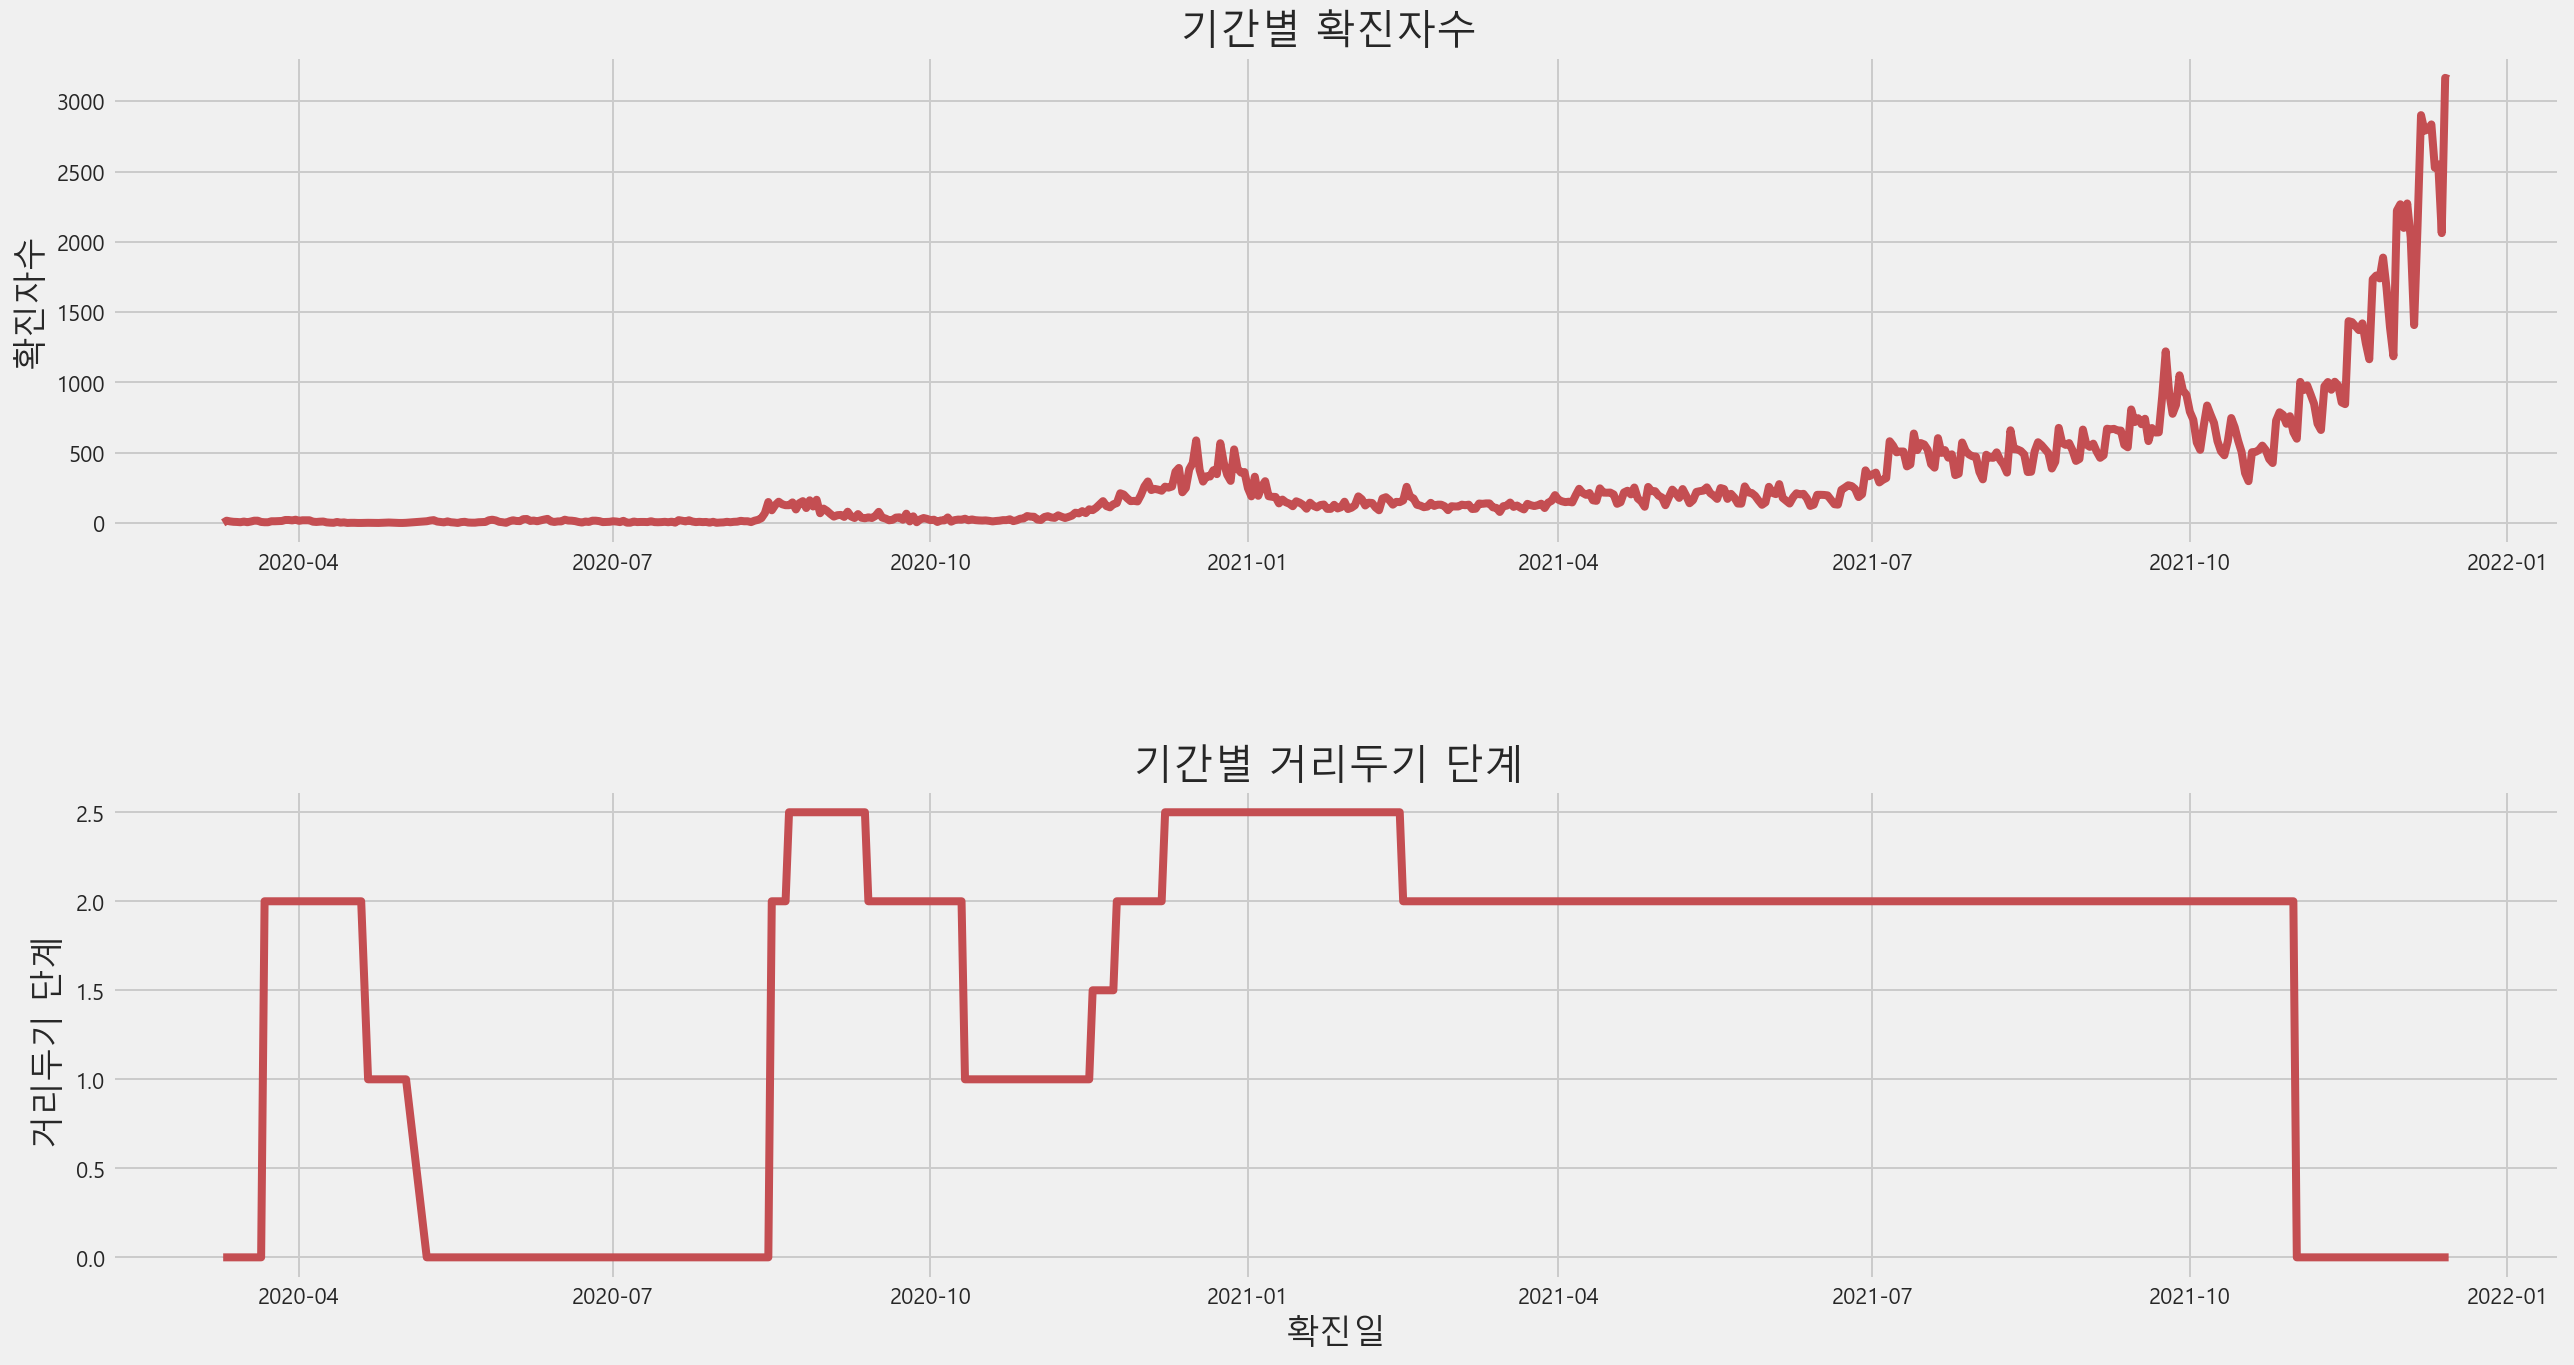

In [14]:
# 합쳐서 사용
fig ,(ax0,ax1 ) = plt.subplots(2,1 ,figsize =  (20,10), sharey =False) # x,y축값을 동일시 

sns.lineplot( x.index, x.values , ax = ax0,color = "r")
sns.lineplot( df_거리두기.index, df_거리두기["거리두기"] , ax = ax1,color = "r")

ax0.set_title("기간별 확진자수 ")
ax0.set_ylabel("확진자수")

ax1.set_title("기간별 거리두기 단계 ")
ax1.set_ylabel("거리두기 단계 ")

fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.show()

In [15]:
df_거리두기_death_ = df_거리두기[df_거리두기["퇴원현황"] == "사망"]

In [16]:
# 거리두기에 따른 확진자 사망 
x = df_거리두기_death_.groupby("거리두기")["퇴원현황"].value_counts()
x = x.unstack()
x["사망"].index

Float64Index([0.0, 1.0, 1.5, 2.0, 2.5], dtype='float64', name='거리두기')

In [17]:
df_거리두기_death = df_거리두기_death_.groupby(["거리두기", "퇴원현황"])["연번"].count().unstack().fillna(0).astype(int)
df_거리두기_death.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 600)

퇴원현황,사망
거리두기,
0.0,559
1.0,18
1.5,13
2.0,537
2.5,293


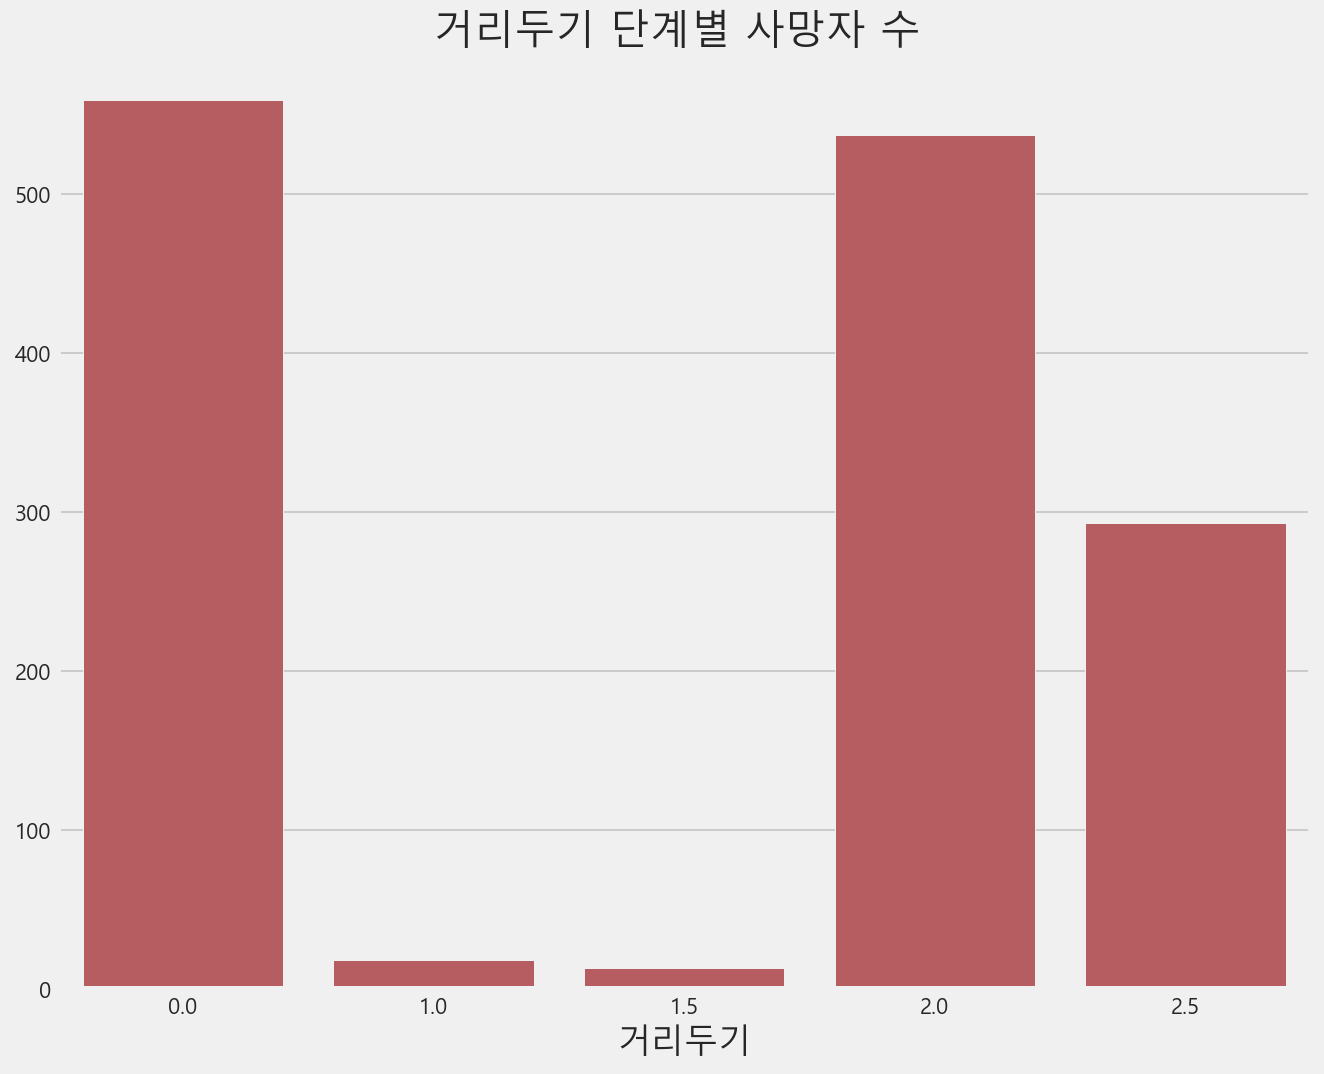

In [18]:
fig ,ax  = plt.subplots(figsize = (10,8))
sns.barplot(x["사망"].index , x["사망"].values , ax = ax ,color ='r')

ax.set_title("거리두기 단계별 사망자 수 ")
plt.show()

### 접촉력 파악 

In [19]:
t = df["접촉력"].value_counts().sort_values().tail(10)

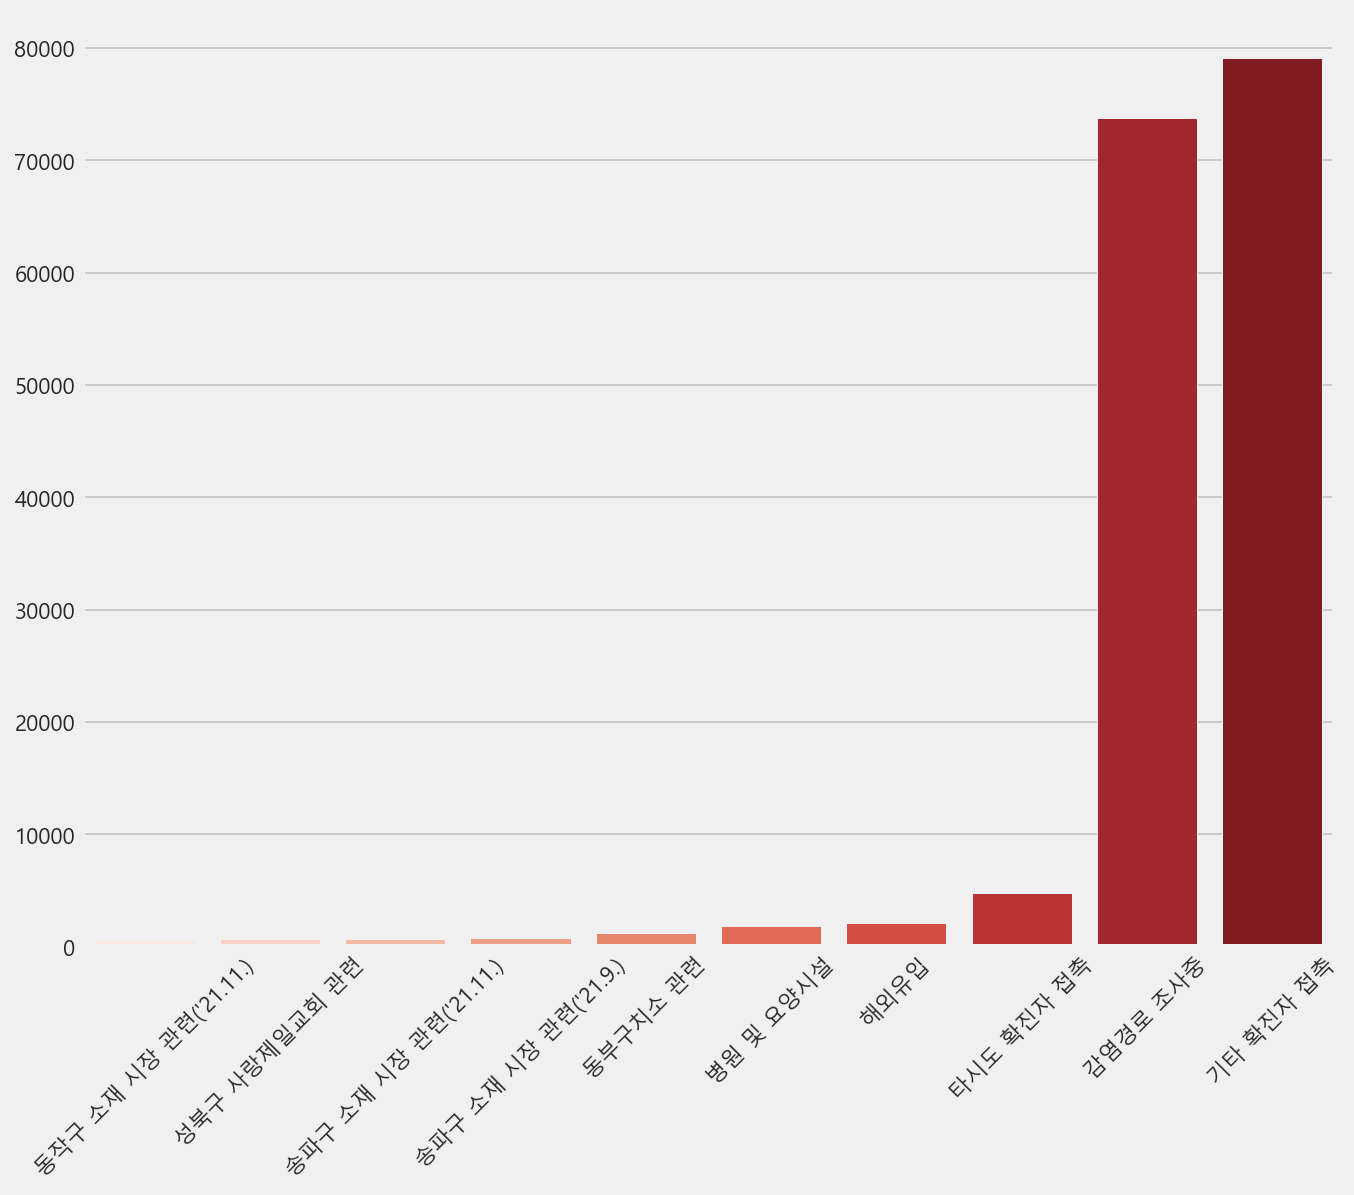

In [20]:
# 전체 기준
fig ,ax  = plt.subplots(figsize = (10,8))
sns.set_palette("Reds", 10)
sns.barplot(t.index , t.values , ax = ax )
plt.xticks(rotation = 45)
plt.show()

In [21]:
top_ = df[df["접촉력"].isin(t.tail(15).index)]
top_

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기
0,193389,540828,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
1,193388,543915,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
2,193387,543911,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
3,193386,543909,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
4,193385,543904,2021-12-15,기타,-,감염경로 조사중,NaN,2021,12,15,50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193367,222,7965,2020-03-12,강북구,필리핀,해외유입,퇴원,2020,3,12,11,0.0
193373,216,8063,2020-03-11,성북구,유럽,해외유입,퇴원,2020,3,11,11,0.0
193374,215,7856,2020-03-11,송파구,-,감염경로 조사중,퇴원,2020,3,11,11,0.0
193382,207,7757,2020-03-11,은평구,-,감염경로 조사중,퇴원,2020,3,11,11,0.0


In [22]:
# 2020년 기준 
top_group_2020 = top_[top_["년"]==2020].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2020.style.background_gradient(cmap="Blues")

월,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,
감염경로 조사중,37,16,5,66,49,440,286,120,474,2729
기타 확진자 접촉,10,9,0,14,33,439,304,116,631,4023
동부구치소 관련,0,0,0,0,0,0,0,0,3,930
병원 및 요양시설,0,0,0,0,0,1,0,0,0,2
성북구 사랑제일교회 관련,0,0,0,0,0,628,13,0,0,0
타시도 확진자 접촉,0,1,2,4,13,102,71,33,124,466
해외유입,126,111,25,23,39,50,23,44,83,110


In [23]:
# 2021년 기준 
top_group_2021 = top_[top_["년"]==2021].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2021.style.background_gradient(cmap="Reds")

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
감염경로 조사중,1348,964,1012,1517,1675,2270,5231,5601,8871,8187,14408,18461
기타 확진자 접촉,1961,1497,1324,2047,2244,2264,6172,6734,8865,7776,16568,16078
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,0,0
동작구 소재 시장 관련('21.11.),0,0,0,0,0,0,0,0,0,0,522,97
병원 및 요양시설,57,82,63,69,113,79,181,155,201,249,412,198
송파구 소재 시장 관련('21.11.),0,0,0,0,0,0,0,0,0,0,302,345
송파구 소재 시장 관련('21.9.),0,0,0,0,0,0,0,1,688,66,0,0
타시도 확진자 접촉,212,146,243,355,354,360,616,530,595,112,253,139
해외유입,149,132,64,80,75,106,163,189,134,116,167,126


### 퇴원자 사망자 비교

In [24]:
df["퇴원"] = df["퇴원현황"].str.contains("퇴원", na=False)
df["사망"] = df["퇴원현황"].str.contains("사망", na=False)

In [25]:
np.round(df["퇴원"].value_counts(normalize=True),2)

True     0.74
False    0.26
Name: 퇴원, dtype: float64

In [26]:
np.round(df["사망"].value_counts(normalize=True),2)

False    0.99
True     0.01
Name: 사망, dtype: float64

In [27]:
퇴원_value = df["퇴원현황"].value_counts()
퇴원_value

퇴원    142541
사망      1420
Name: 퇴원현황, dtype: int64

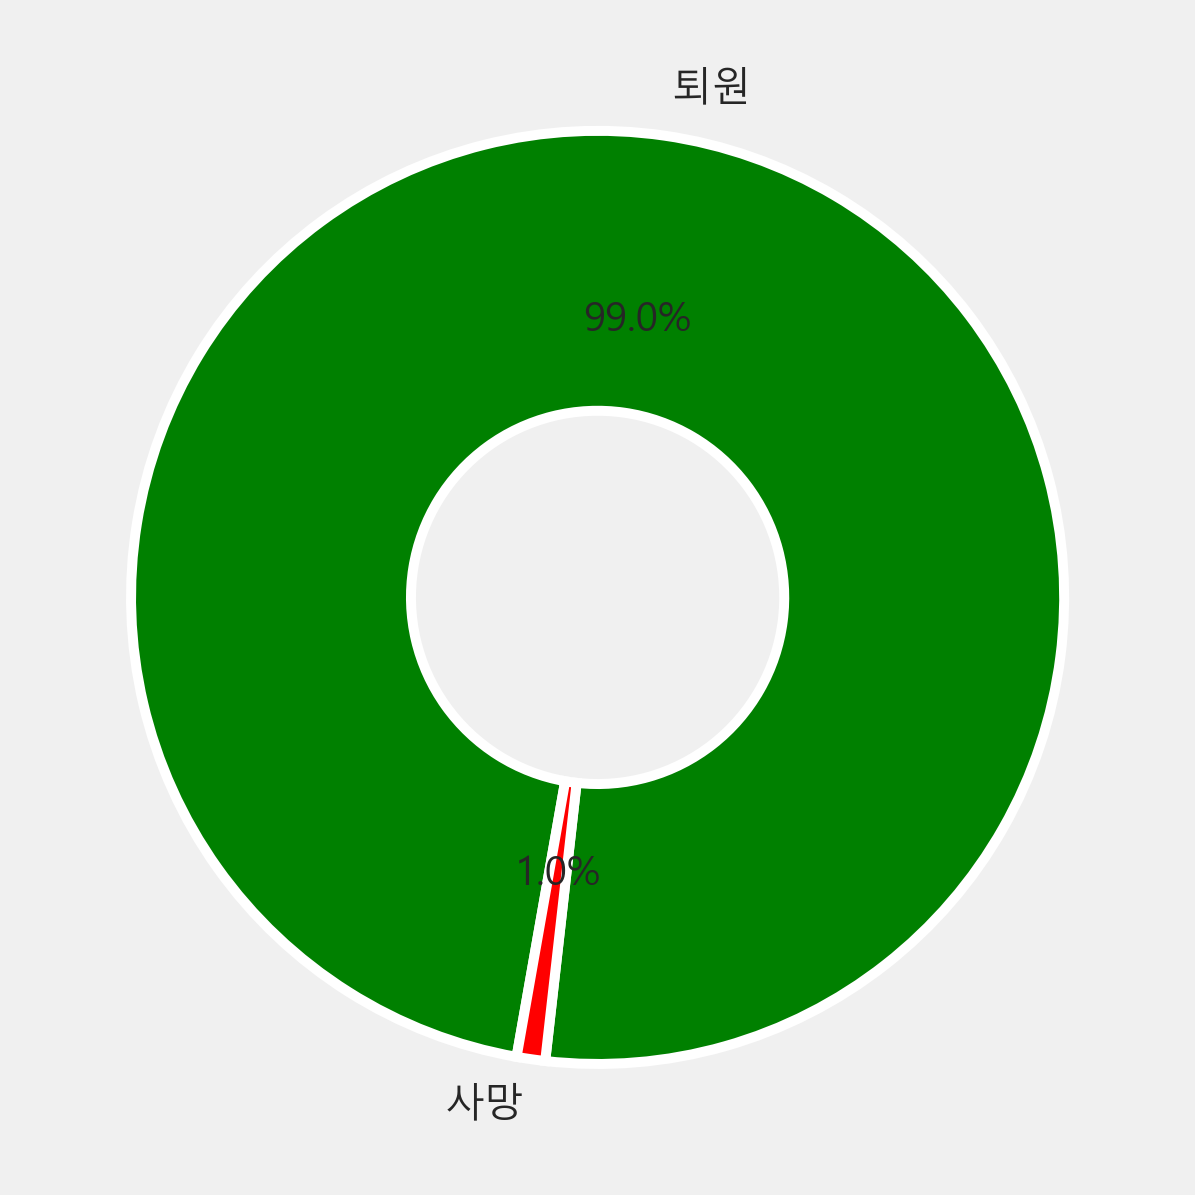

In [28]:
# 전체 사망자 비율 파이차트 
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}
colors = ["green","red"]

ax.pie(x = 퇴원_value.values, labels = 퇴원_value.index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :20}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()

In [29]:
df_death = df[df["퇴원현황"] == "사망"]
df_alive = df[df["퇴원현황"] == "퇴원"]

In [30]:
# 2020일별 사망자수 (계절성)
df_d_2020 = df_death[df_death["년"]==2020].groupby(["퇴원현황", "월","일"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2020.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 20)

In [31]:
# 2021일별 사망자수 (계절성, 중환자수가 늘어나서 인가? )
df_d_2021 = df_death[df_death["년"]==2021].groupby(["퇴원현황", "월","일"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2021.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 20)

### 여행력 별 확진자 

In [32]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].replace("-",np.nan) # - 를 NaN으로 변경 

df_oversea =df[df["해외"].notnull()].copy()
df_oversea.drop(df[df["해외"] == "성석교회 관련 확진자 접촉 추정"].index ,inplace =True ) 
df_oversea.drop(df[df["해외"] == "천리교 혜성교회 생활관 거주자 집단확진"].index ,inplace =True ) 

In [33]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
europe = europe.replace(",", "|")
south_america = "브라질,아르헨티아,칠레,볼리비아,멕시코,페루"
south_america = south_america.replace(",", "|")

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
df_oversea.loc[df_oversea["해외"].str.contains('아랍에미리트'), "해외"] = 'UAE'
df_oversea.loc[df_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
df_oversea.loc[df_oversea["해외"].str.contains('미국'), "해외"] = '미국'

df_oversea.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기,퇴원,사망,해외
92,193297,542874,2021-12-15,노원구,프랑스,해외유입,NaN,2021,12,15,50,0.0,False,False,유럽
192,193297,542874,2021-12-15,노원구,프랑스,해외유입,NaN,2021,12,15,50,0.0,False,False,유럽
655,192834,536619,2021-12-15,강남구,미국,해외유입,NaN,2021,12,15,50,0.0,False,False,미국


In [34]:
import re 
def d(s):
    contry = re.compile('[^ ㄱ-ㅣ가-힣+]')# 한글과 띄어쓰기를 제외한 모든 글자
    result = contry.sub('', s) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    return(result)

In [35]:
df_oversea["해외"] = df_oversea["해외"].apply(d)

In [36]:
set(df_oversea["해외"])

{'',
 ' ',
 '  ',
 '가나',
 '강릉',
 '과테말라',
 '괌',
 '그리스',
 '나이지리아',
 '남미',
 '남아공',
 '남아프리카공화국',
 '네덜란드',
 '네팔',
 '덴마크',
 '도미니카공화국',
 '동남아시아',
 '두바이',
 '라오스',
 '러브코랄무드',
 '러시아',
 '레바논',
 '루마니아',
 '르완다',
 '리투아니아',
 '마케도니아',
 '말레이시아',
 '모리셔스',
 '모리타니아',
 '몰디브',
 '몰타',
 '몽골',
 '미국',
 '미얀마',
 '바레인',
 '방글라데시',
 '방콕 푸켓',
 '베네수엘라',
 '베트남',
 '베트남 사이공',
 '벨기에',
 '북미',
 '불가리아',
 '사우디아라비아',
 '세네갈',
 '수단',
 '스리랑카',
 '스리랑카 ',
 '스웨덴',
 '스위스',
 '시에라리온',
 '싱가포르',
 '싱가폴',
 '아랍에미레이트',
 '아르헨티나',
 '아메리카',
 '아보카도랩',
 '아시아',
 '아이슬란드',
 '아이티공화국',
 '아제르바이잔',
 '아프가니스탄',
 '아프리카',
 '아프리카 아시아',
 '아프카니스탄',
 '알제리',
 '에티오피나',
 '에티오피아',
 '오만',
 '오세아니아',
 '요르단',
 '우즈베키스탄',
 '우크라이나',
 '유럽',
 '이라크',
 '이란',
 '이스라엘',
 '이집트',
 '인도',
 '인도 ',
 '인도 델리',
 '인도네시아',
 '인도네시아자카르타',
 '인도네시아자카르타 경유',
 '일본',
 '일본도쿄',
 '자카르타',
 '잠비아',
 '중국',
 '중남미유럽',
 '중동',
 '중복',
 '짐바브웨',
 '카자흐스탄',
 '카타르',
 '캄보디아',
 '캄보디아프노펜경유',
 '캐나다',
 '케냐',
 '코스코 시핑 한국',
 '코스타리카',
 '코트디부아르',
 '코펜하겐',
 '콜롬비아',
 '콩고',
 '콩고민주공화국',
 '쿠웨이트',
 '키르기스스탄',
 '타지키스탄',
 '탄자니아',


In [37]:
oversea_group  = df_oversea.groupby(["확진일","해외"])["연번"].count()

In [38]:
oversea_group = oversea_group.groupby(level = [1]).cumsum()
oversea_group

확진일         해외  
2020-03-11  유럽        1
2020-03-12  유럽        3
            필리핀       1
2020-03-13  유럽        5
2020-03-14  필리핀       2
                   ... 
2021-12-14  이스라엘      2
2021-12-15           29
            미국      448
            유럽      439
            인도       24
Name: 연번, Length: 1389, dtype: int64

In [39]:
oversea_group = oversea_group.reset_index()
oversea_group = oversea_group.rename(columns={"연번": "누적확진수"})
oversea_group.head(3)

,확진일,해외,누적확진수
0,2020-03-11,유럽,1
1,2020-03-12,유럽,3
2,2020-03-12,필리핀,1


In [40]:
oversea_group_2020 = oversea_group[oversea_group["확진일"].isin(pd.date_range("2020-03-11", "2020-12-31")) ]
oversea_group_2021 = oversea_group[oversea_group["확진일"].isin(pd.date_range("2021-01-01", "2021-12-15")) ]

In [41]:
# 전체 , 2021, 2020
oversea_count = oversea_group["해외"].value_counts().sort_values().tail(10)
oversea_count_2021 =  oversea_group_2021["해외"].value_counts().sort_values().tail(10)
oversea_count_2020 = oversea_group_2020["해외"].value_counts().sort_values().tail(10)

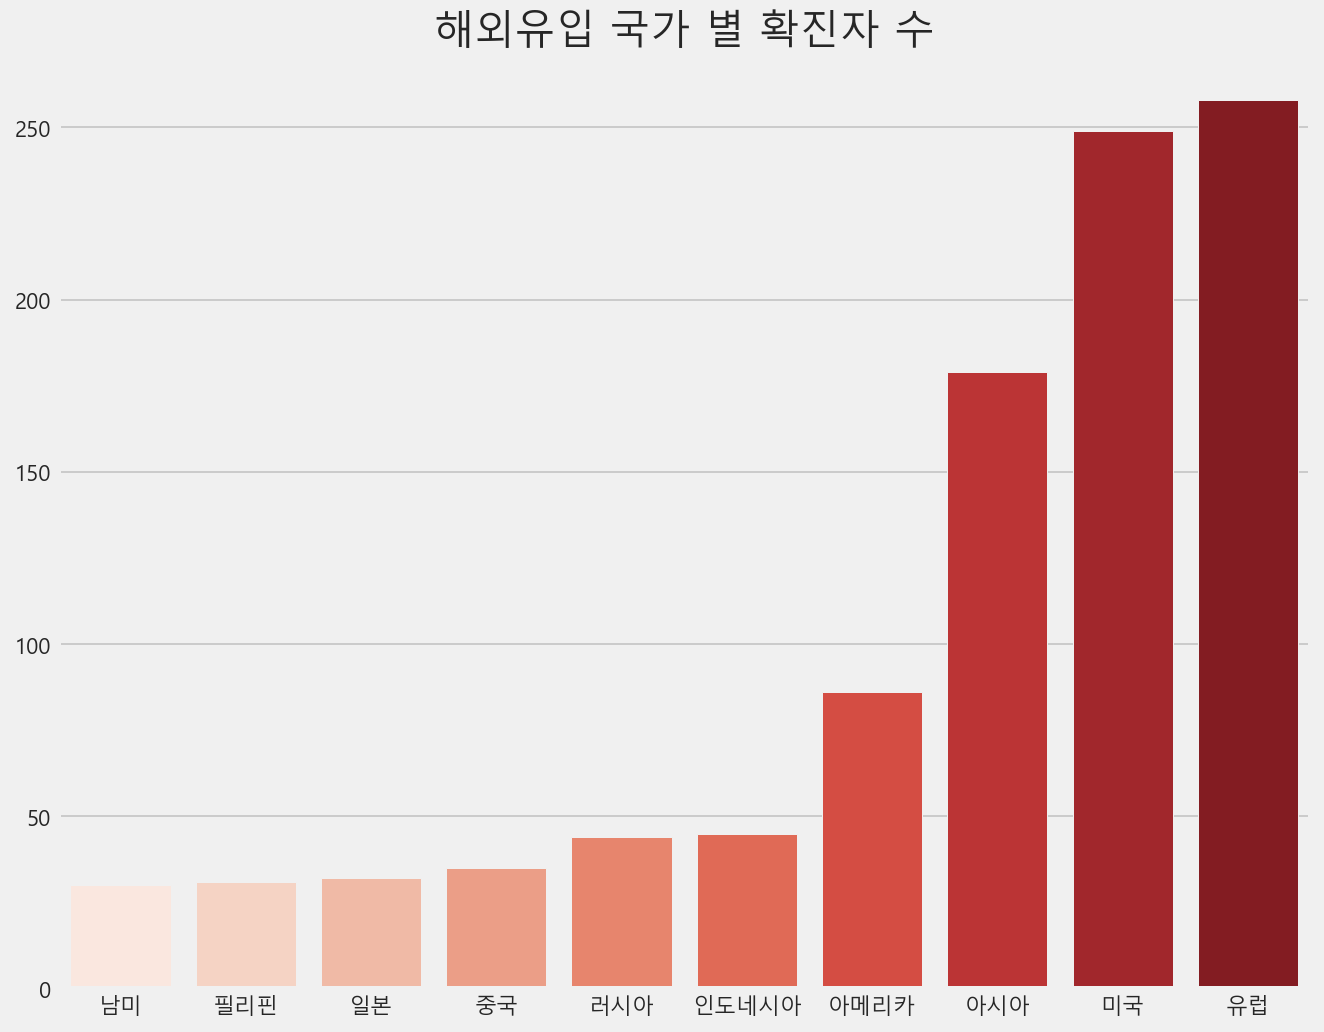

In [42]:
fig ,ax  = plt.subplots(figsize = (10, 8))
sns.barplot(oversea_count.index , oversea_count.values , ax = ax )
ax.set_title("해외유입 국가 별 확진자 수")

plt.show()

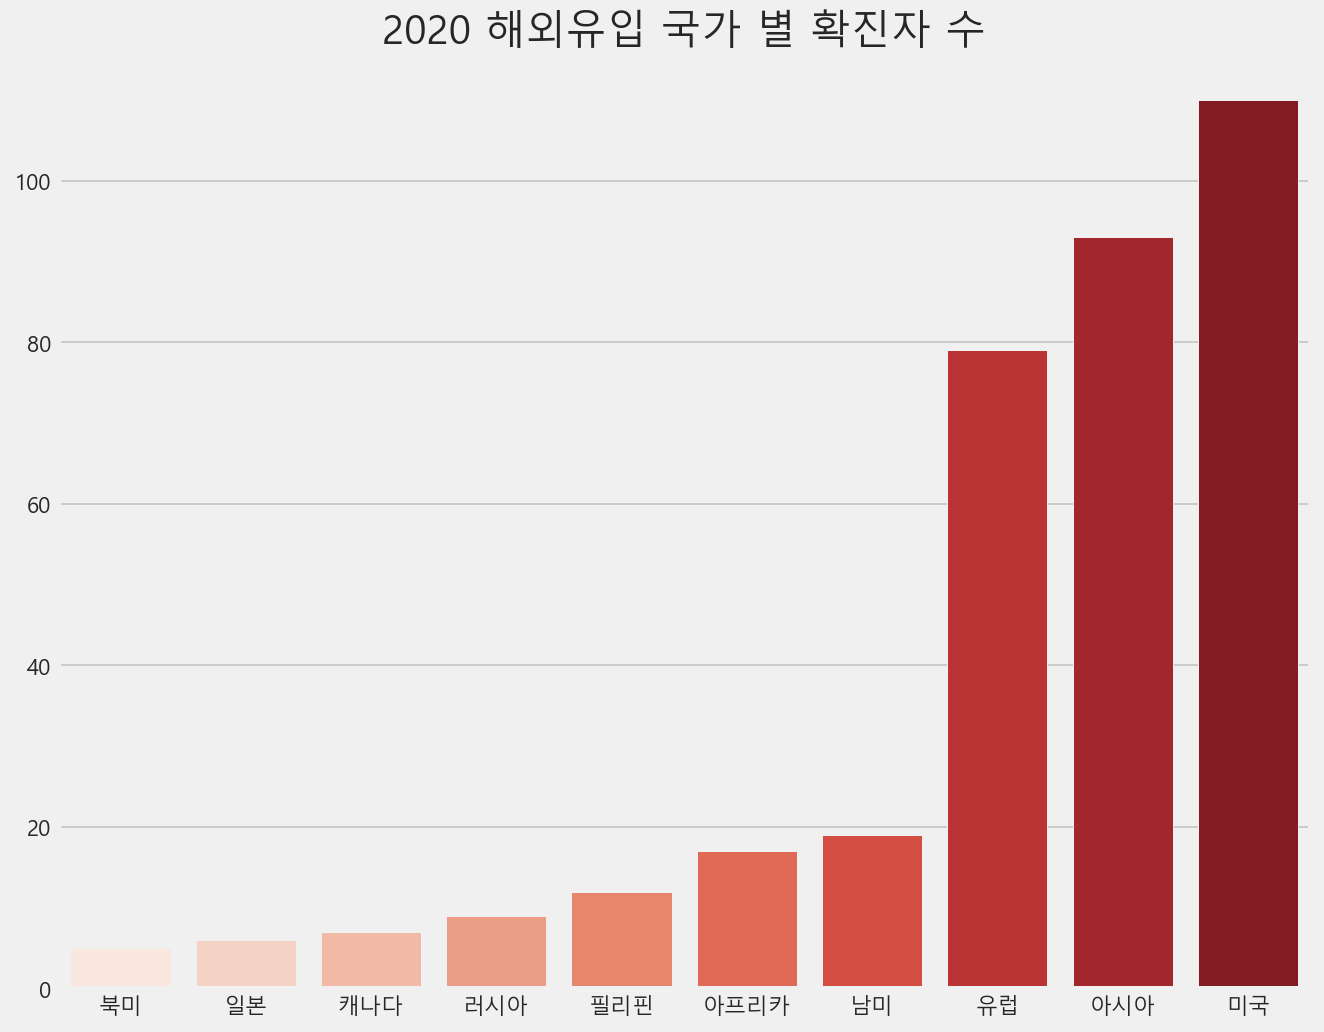

In [43]:
fig ,ax  = plt.subplots(figsize = (10, 8))
sns.barplot(oversea_count_2020.index , oversea_count_2020.values , ax = ax )
ax.set_title("2020 해외유입 국가 별 확진자 수")

plt.show()

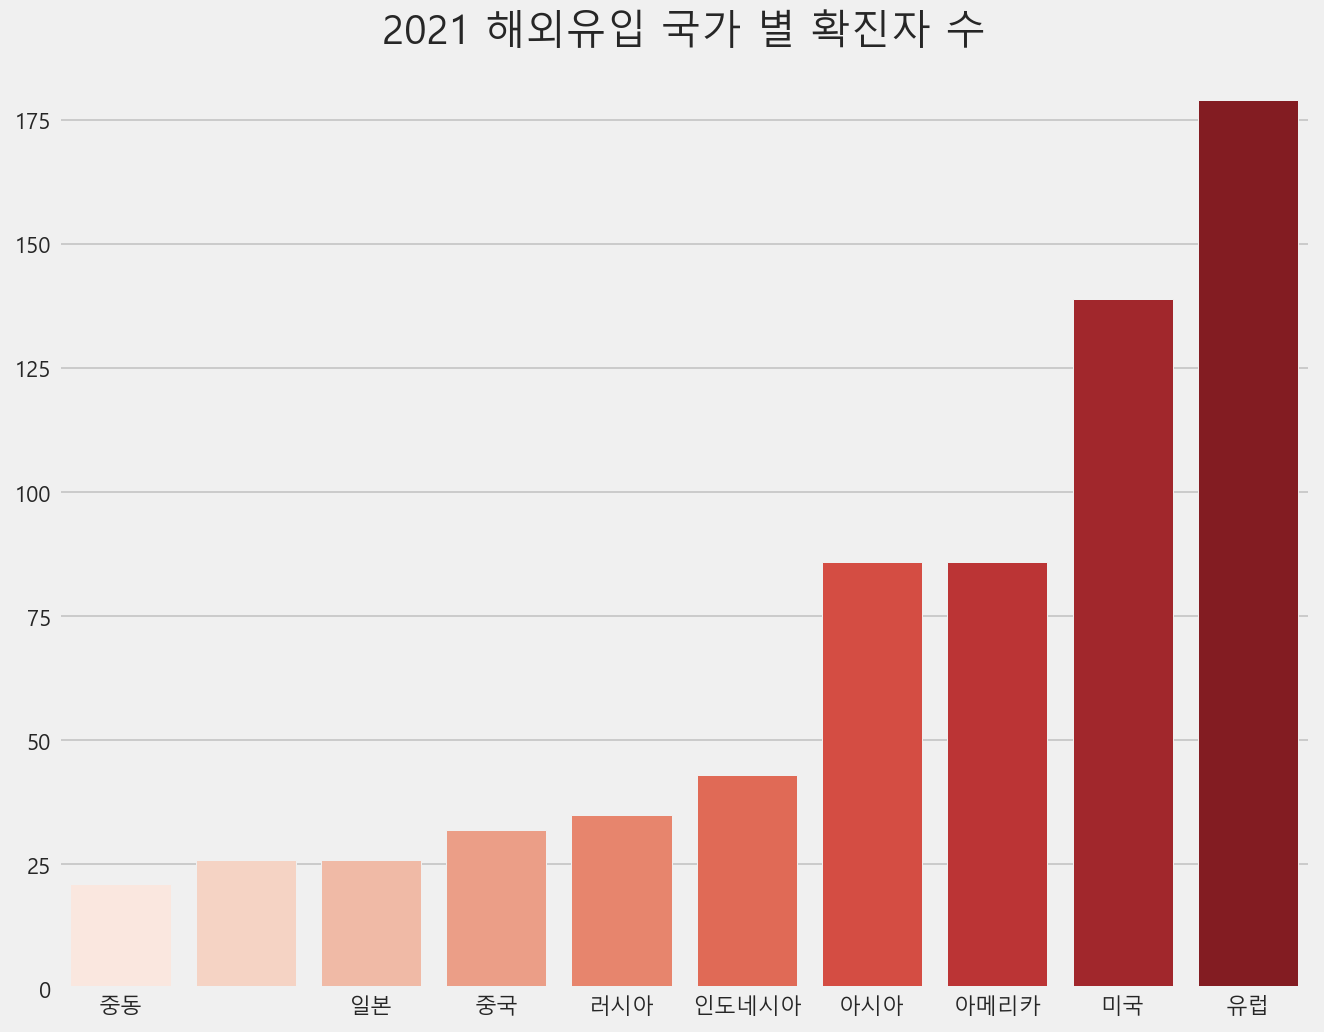

In [44]:
fig ,ax  = plt.subplots(figsize = (10, 8))
sns.barplot(oversea_count_2021.index , oversea_count_2021.values , ax = ax )
ax.set_title("2021 해외유입 국가 별 확진자 수")
plt.show()

## 지역별 확진자 수 파악 

In [45]:
x  = df["거주지"].value_counts().head(20)

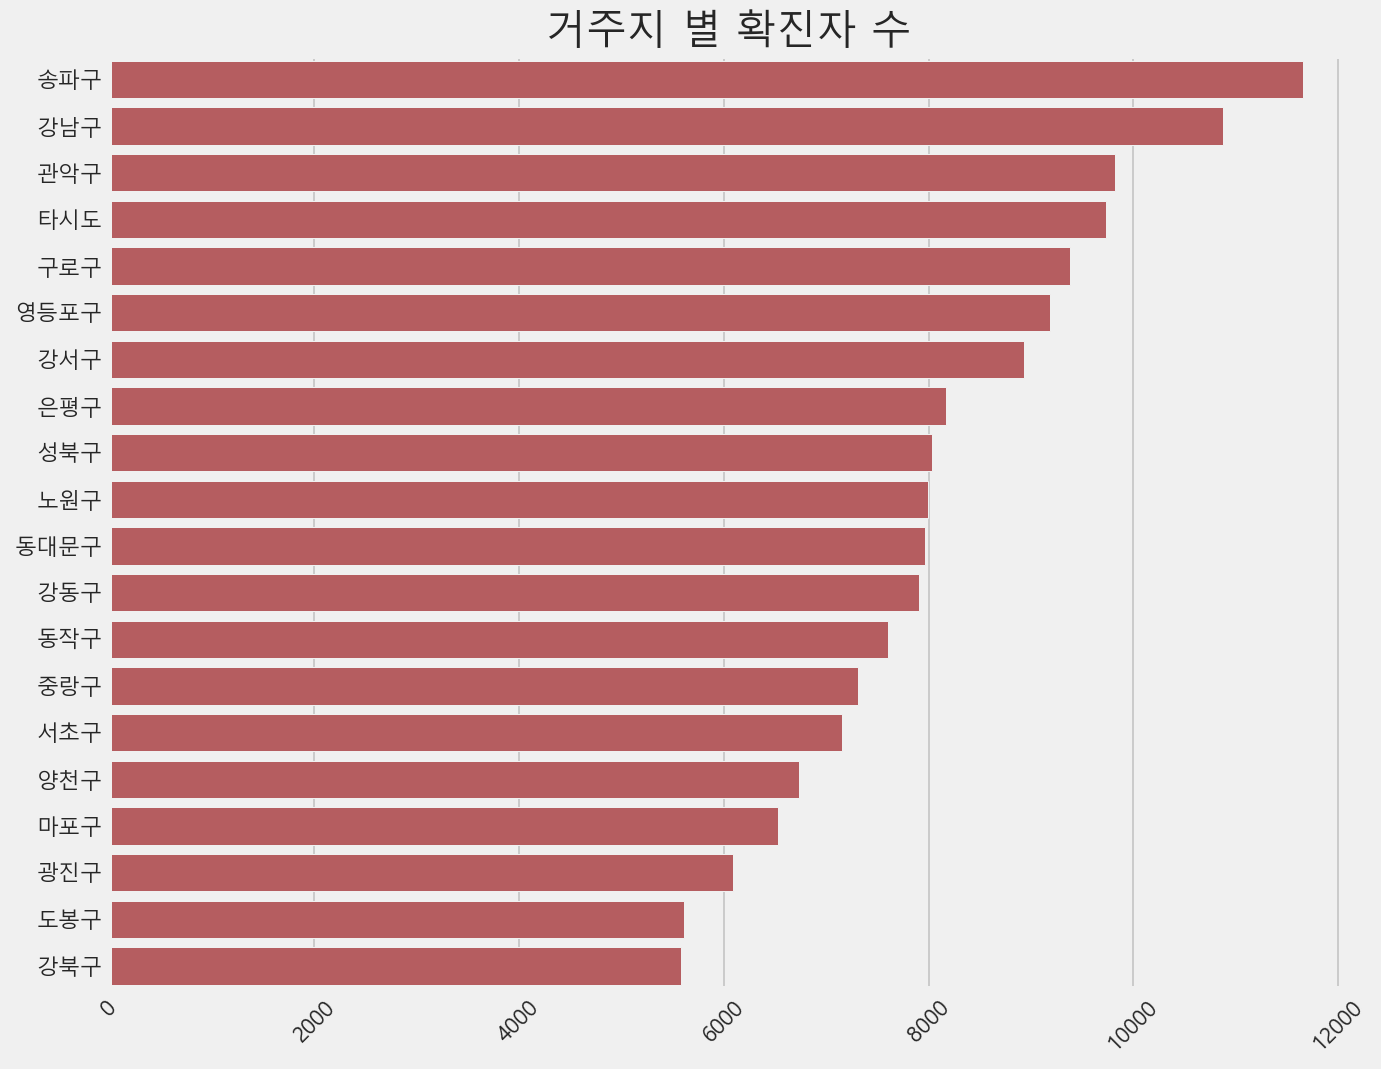

In [46]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x.values, x.index  , ax =ax , color = 'r')

ax.set_title("거주지 별 확진자 수 ")
plt.xticks(rotation = 45)
plt.show()

In [47]:
import folium

In [48]:
df_location = pd.read_csv("위도,경도.csv")
df_location.head(3)

,거주지,Latitude,Longitude
0,강남구,37.517236,127.047325
1,강동구,37.530125,127.123762
2,강북구,37.639610,127.025657


In [49]:
df_location_m= df.merge(df_location, on = "거주지")
df_location_m

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기,퇴원,사망,해외,Latitude,Longitude
0,193381,543888,2021-12-15,강동구,-,감염경로 조사중,NaN,2021,12,15,50,0.0,False,False,NaN,37.530125,127.123762
1,193381,543888,2021-12-15,강동구,-,감염경로 조사중,NaN,2021,12,15,50,0.0,False,False,NaN,37.530125,127.123762
2,193224,542083,2021-12-15,강동구,-,감염경로 조사중,NaN,2021,12,15,50,0.0,False,False,NaN,37.530125,127.123762
3,193222,542039,2021-12-15,강동구,-,감염경로 조사중,NaN,2021,12,15,50,0.0,False,False,NaN,37.530125,127.123762
4,193127,540974,2021-12-15,강동구,-,감염경로 조사중,NaN,2021,12,15,50,0.0,False,False,NaN,37.530125,127.123762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178936,289,8619,2020-03-19,동작구,유럽,해외유입,퇴원,2020,3,19,12,0.0,True,False,유럽,37.512402,126.939252
178937,280,8456,2020-03-18,동작구,유럽,해외유입,퇴원,2020,3,18,12,0.0,True,False,유럽,37.512402,126.939252
178938,276,8446,2020-03-18,동작구,유럽,해외유입,퇴원,2020,3,18,12,0.0,True,False,유럽,37.512402,126.939252
178939,267,8369,2020-03-17,동작구,-,성남 은혜의강 교회,퇴원,2020,3,17,12,0.0,True,False,NaN,37.512402,126.939252


In [50]:
df_location_count = pd.DataFrame(df.groupby(["거주지"])["연번"].count())
df_location_count.columns = ["확진자수"]
df_location_count = df_location_count[df_location_count["확진자수"] > 1] 
df_location_count.head(3)

,확진자수
거주지,
강남구,10873
강동구,7902
강북구,5581


In [51]:
import json 

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [52]:
map = folium.Map(location = [df_location_m["Latitude"].mean(), df_location_m["Longitude"].mean()],
                zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(
                geo_data = geo_str ,
                  data = df_location_count["확진자수"],
                  columns = [[df_location_count.index,df_location_count["확진자수"]]] ,
                   fill_color = 'Reds',
                  key_on = 'feature.properties.name' ,
               )

map